In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Linear Regression (Predicting House Prices)

## Step 1: Descriptive Statistics

In [2]:
df_train = pd.read_csv('housing_data_processed.csv') # reading the training dataset
target = 'SalePrice' # define the target variable
df_train.head() # extracts the forst fove columns

,SalePrice,BsmtUnfSF_standardized,FullBath_standardized,TotRmsAbvGrd_standardized,GarageYrBlt_standardized,BsmtFinSF1_standardized,OpenPorchSF_standardized,KitchenAbvGr_standardized,BsmtFinSF2_standardized,OverallQual_standardized,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,-0.944591,0.789741,0.912210,0.992426,0.575425,0.216503,-0.211454,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,1,0
1,181500,-0.641228,0.789741,-0.318683,-0.101543,1.171992,-0.704483,-0.211454,-0.288653,-0.071836,...,0,0,0,0,1,0,0,0,1,0
2,223500,-0.301643,0.789741,-0.318683,0.911391,0.092907,-0.070361,-0.211454,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,1,0
3,140000,-0.061670,-1.026041,0.296763,0.789839,-0.499274,-0.176048,-0.211454,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,0,0
4,250000,-0.174865,0.789741,1.527656,0.870874,0.463568,0.563760,-0.211454,-0.288653,1.374795,...,0,0,0,0,1,0,0,0,1,0


In [3]:
print(df_train.describe().iloc[:, :10]) # describing the training dataset

           SalePrice  BsmtUnfSF_standardized  FullBath_standardized  \
count    1460.000000            1.460000e+03           1.460000e+03   
mean   180921.195890           -4.935169e-17           2.694952e-16   
std     79442.502883            1.000343e+00           1.000343e+00   
min     34900.000000           -1.284176e+00          -2.841822e+00   
25%    129975.000000           -7.793259e-01          -1.026041e+00   
50%    163000.000000           -2.031633e-01           7.897405e-01   
75%    214000.000000            5.450557e-01           7.897405e-01   
max    755000.000000            4.004295e+00           2.605522e+00   

       TotRmsAbvGrd_standardized  GarageYrBlt_standardized  \
count               1.460000e+03               1460.000000   
mean                1.033800e-16                  0.003358   
std                 1.000343e+00                  0.972296   
min                -2.780469e+00                 -3.180863   
25%                -9.341298e-01                 -

### Analysing Target Variable - 'SalePrice'

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64




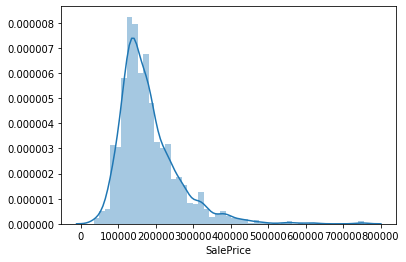

In [4]:
print(df_train['SalePrice'].describe()) # describing output (target) variable
print('\n') # new line command
ax = sns.distplot(df_train['SalePrice']) #checking the distribution of the output variable


### Scatter Plots: Relationship with Numerical Variables

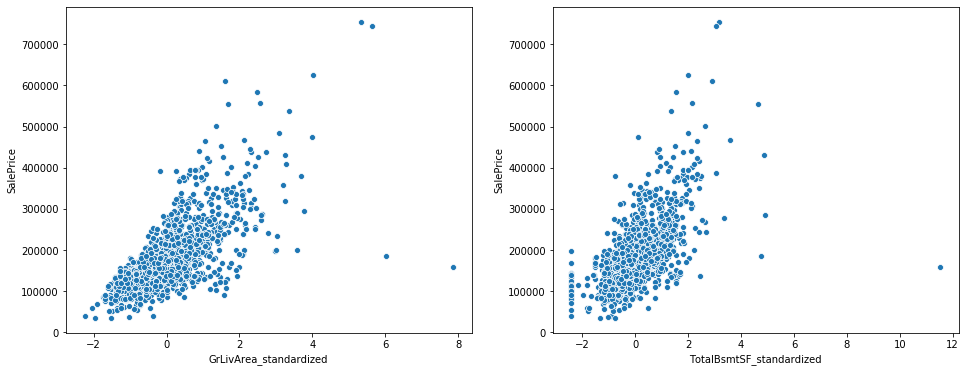

In [5]:
#scatter plot to check how selected two variables are related to saleprice

fig, axs = plt.subplots(ncols=2, figsize= (16, 6)) # Divides the plotting area into sub-ares 
                                 
plt.subplot(1, 2, 1) # indicates there are one row two columns and this is the first plot
ax = sns.scatterplot(x='GrLivArea_standardized', y='SalePrice', data=df_train) # scatter plot 
# for x='GrLivArea', y='SalePrice

plt.subplot(1, 2, 2) # indicates there are one row two columns and this is the second plot
ax = sns.scatterplot(x='TotalBsmtSF_standardized', y='SalePrice', data=df_train) # scatter plot 
# for x='TotalBsmtSF', y='SalePrice


* It seems that 'SalePrice' and 'GrLivArea' have a linear relationship.
* There is also a relationship between salleprice and TotalBsmtSF - but this appears to be more exponential

### Boxplots: Relationship with Categorical Variables

In [7]:
df_train

,SalePrice,BsmtUnfSF_standardized,FullBath_standardized,TotRmsAbvGrd_standardized,GarageYrBlt_standardized,BsmtFinSF1_standardized,OpenPorchSF_standardized,KitchenAbvGr_standardized,BsmtFinSF2_standardized,OverallQual_standardized,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,-0.944591,0.789741,0.912210,0.992426,0.575425,0.216503,-0.211454,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,1,0
1,181500,-0.641228,0.789741,-0.318683,-0.101543,1.171992,-0.704483,-0.211454,-0.288653,-0.071836,...,0,0,0,0,1,0,0,0,1,0
2,223500,-0.301643,0.789741,-0.318683,0.911391,0.092907,-0.070361,-0.211454,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,1,0
3,140000,-0.061670,-1.026041,0.296763,0.789839,-0.499274,-0.176048,-0.211454,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,0,0
4,250000,-0.174865,0.789741,1.527656,0.870874,0.463568,0.563760,-0.211454,-0.288653,1.374795,...,0,0,0,0,1,0,0,0,1,0
5,143000,-1.139286,-1.026041,-0.934130,0.587252,0.632450,-0.251539,-0.211454,-0.288653,-0.795151,...,0,0,0,0,1,0,0,0,1,0
6,307000,-0.566519,0.789741,0.296763,1.032943,2.029558,0.156111,-0.211454,-0.288653,1.374795,...,0,0,0,0,1,0,0,0,1,0
7,200000,-0.795173,0.789741,0.296763,-0.223095,0.910994,2.375537,-0.211454,-0.090220,0.651479,...,0,0,0,0,1,0,0,0,1,0
8,129900,0.871057,0.789741,0.912210,-1.924825,-0.973018,-0.704483,4.328579,-0.288653,0.651479,...,0,0,0,0,1,0,0,0,0,0
9,118000,-0.967230,-1.026041,-0.934130,-1.600686,0.893448,-0.644091,4.328579,-0.288653,-0.795151,...,0,0,0,0,1,0,0,0,1,0


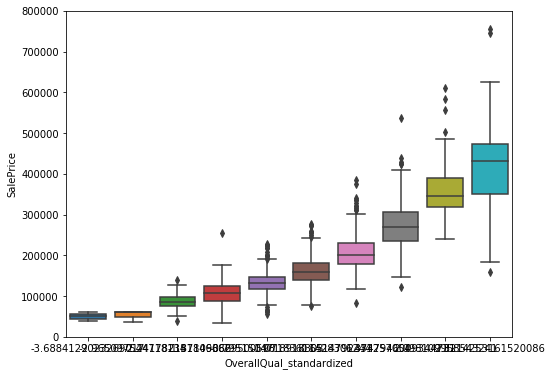

In [8]:
#box plot overallqual/saleprice

f, ax = plt.subplots(figsize=(8, 6)) # defines the size of the plot
fig = sns.boxplot(x='OverallQual_standardized', y="SalePrice", data=df_train) # plots the data on a box plot
fig.axis(ymin=0, ymax=800000); # sets the limit for y axis

* 'SalePrice' is impacted by 'OverallQual'

### Correlation Matrix

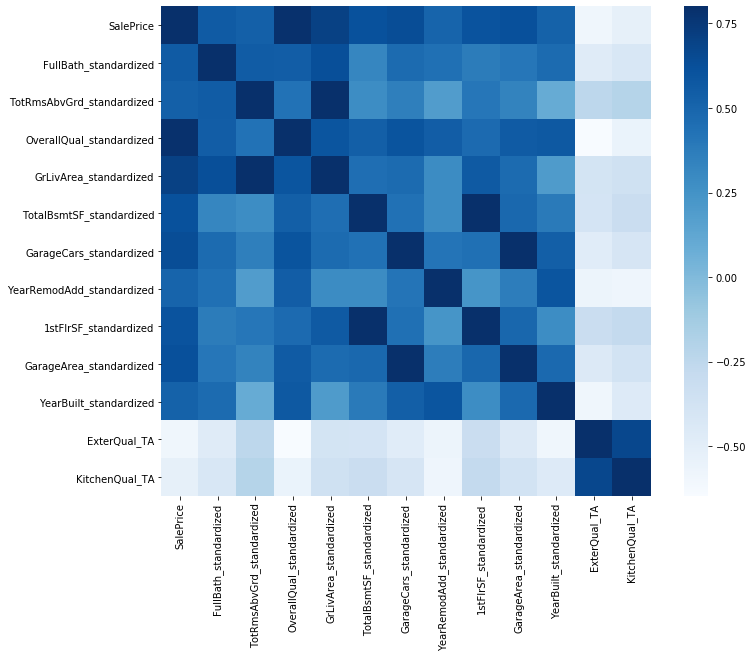

In [9]:
#correlation matrix

# computes the person correlation among variables
corrmat = df_train.corr() 

# returns highly correlated variables
high_c = corrmat[corrmat['SalePrice'].abs()>0.5].index

# plots a correlation plot
f, ax = plt.subplots(figsize=(12, 9)) # determines the figure size
ax = sns.heatmap(corrmat.loc[high_c, high_c], vmax=.8, square=True, cmap="Blues") # creates a heatmap using the correlation matrix

### Scatter Plot Matrix

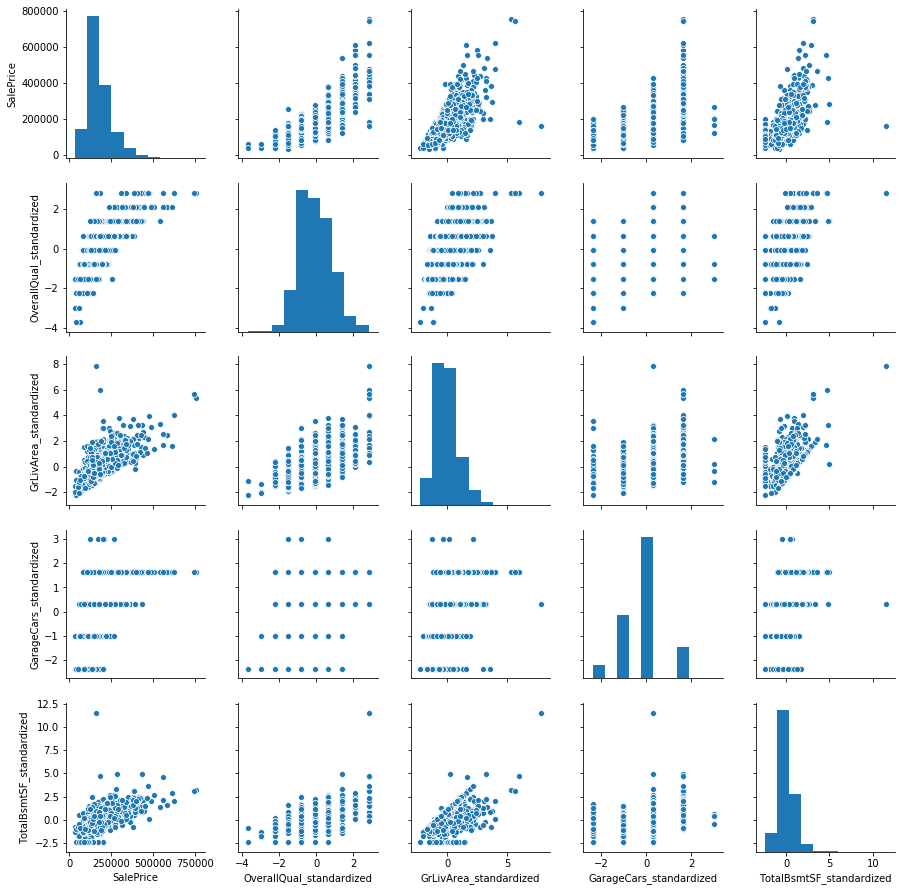

In [11]:
# scatterplot to see the distributions of the variables and 
# how they are correlated to ther variables

cols = ['SalePrice', 'OverallQual_standardized', 'GrLivArea_standardized', 
        'GarageCars_standardized', 'TotalBsmtSF_standardized'] # important variables

ax = sns.pairplot(df_train[cols], size = 2.5) # scatter plots


#######################################################################################

## Step 2: DATA preprocessing - This was done in Module 5

## Step 3: Fitting a Model

### Fitting Linear Regression

In [12]:
input_col = list(set(df_train.columns) - set(['SalePrice']))  
# determines the input variables

model = LinearRegression() # creates a linear regression instance

model.fit(df_train[input_col], df_train[target]) 
# fits the data to find the model coeffs

# prints the model coefficients
print('Model coefficients:') 
print(model.coef_)

# prints the R2 value which shows the percent of variance explained by the model
# 100% is a perfect model
# 0 is useles

print('\n')

print('R2 value: ' + str(round(100*model.score(df_train[input_col], 
                                               df_train[target]), 2)))
print('\n')


# Builds a new dataframe that will contain the actual target values
# predicted target values variables
# and Error (Residuals) (Actual - Target)
# Note that the higher the error the worse the model
# Higher the R2, better the model

pred_vs_actual = pd.DataFrame()
pred_vs_actual['actual'] = df_train[target]
pred_vs_actual['predicted'] = np.round(model.predict(df_train[input_col]), 0)
pred_vs_actual['error'] = pred_vs_actual['actual'] - pred_vs_actual['predicted']
print(pred_vs_actual.head())

Model coefficients:
[ 1.28173422e+04  1.92130758e+04  1.44158703e+03  1.26194642e+02
  1.20417982e+03 -2.73208112e+04 -1.94526912e+04 -9.86937716e+03
  7.65463052e+02  1.30204683e+03 -3.28365366e+04 -3.02415222e+03
  1.86052935e+04  3.79637208e+04 -7.06825648e+02 -1.62943400e+05
  5.64419398e+03 -5.27988927e+03 -1.30477854e+04  2.03208355e+03
 -1.76934953e+04  1.08360521e+04  1.28359346e+05  4.24504251e+03
  1.58693774e+04  4.09004310e+03 -1.27894659e+04 -2.09733111e+04
  3.74454642e+04 -7.54608512e+03 -1.89050650e+03  5.49565363e+02
 -1.84535117e+05 -2.35249531e+04  3.68122739e+04 -6.63111485e+04
  1.86112049e+04  1.45828283e+04  2.79024510e+04  2.72617509e+03
 -2.88695362e+03  7.06028363e+03 -3.42672979e+03  6.42805077e+03
  3.16908605e+03  1.88125974e+17 -2.60016595e+03  3.78820482e+03
  1.06428755e+04 -2.25327720e+04  4.90896432e+03  9.60070644e+03
 -2.26258217e+04 -7.77102927e+03  2.39364394e+16  4.39471961e+03
  5.02434406e+03  6.88101052e+02  3.01067390e+03 -1.00733155e+04
  4.1

## Step 4: Assesing the model

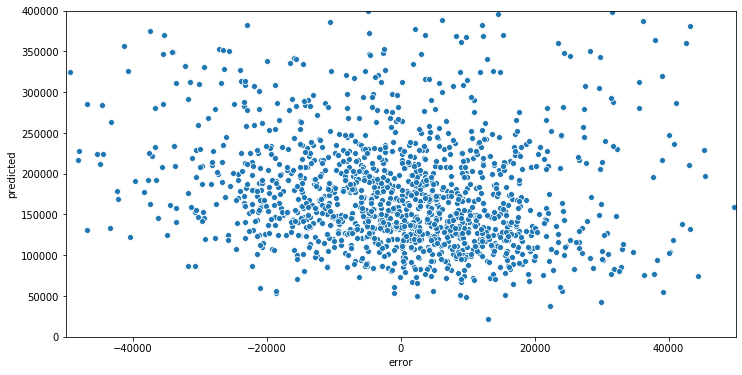

In [13]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x='error', y='predicted', data=pred_vs_actual) 
#plots the error vs. predicted
limits = ax.set(xlim=(-50000, 50000), ylim=(0, 400000)) #sets the limit for x and y axis

# It seems like the corresponding residual plot is reasonably random.

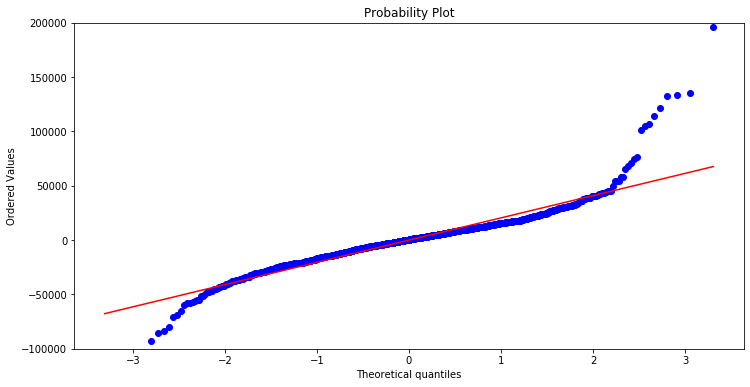

In [14]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size

_, (__, ___, r) = sp.stats.probplot(pred_vs_actual['error'], plot=ax, fit=True) 
# generates the normality plot

limits = ax.set(ylim=(-100000, 200000)) # sets the limits for the graph

#######################################################################################

# Classification - Predicting Customer Churn with Logistic Regression, Decision Trees, Random Forests, and KNN

In [16]:
df = pd.read_csv('telco_churn_processed.csv') # reading the dataset
input_var  = set(df.columns) - set(['Churn_Yes'])
X = df[input_var]
Y = df['Churn_Yes']

## Step 1: Descriptive Statistics - This has been done in Module 4

## Step 2: Data Preprocessing - This has been done in Module 5

## Fitting Models

In [17]:
models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN'] # models that will be built

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [19]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [20]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#######################################################################################

## Making Predictions and Model Assessment

### Accuracy Rate, Sensitivity, Specificity

In [32]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [33]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

In [34]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)


# accuracy, sensitivity, aand specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)


# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [35]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.782138,0.746243,0.818991
Decision Trees,0.794729,0.775723,0.814243
Random Forest,0.797950,0.757225,0.839763
K-NN,0.790337,0.679769,0.903858


### Roc Curve

In [36]:
from sklearn.metrics import roc_curve, auc

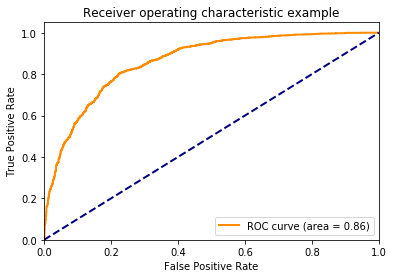

In [37]:
score_Y_dt = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()